# ICU - Simulating ICU dynamics
This section shows how to use the `icu` simulation functionality of Episuite.

In [1]:
import pandas as pd
import numpy as np
import episuite
from matplotlib import pyplot as plt

from episuite import icu, durations, distributions
from episuite import data

In [2]:
sample_data = data.admissions_sample()

In [3]:
sample_data_admissions = sample_data.groupby("DATE_START").size().sort_index()
sample_data_admissions = sample_data_admissions.resample("D").sum().fillna(0)
admissions = icu.ICUAdmissions(sample_data_admissions)

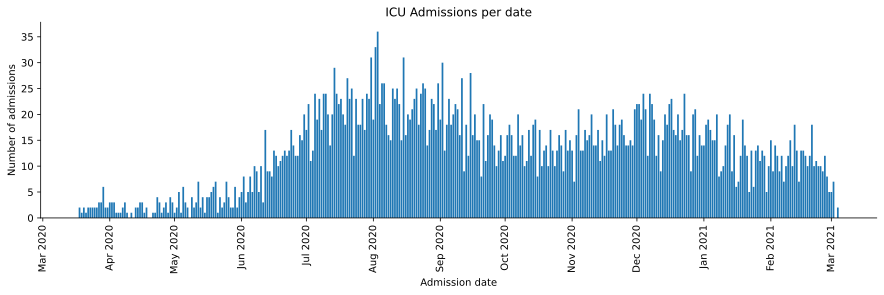

In [4]:
fig = plt.figure(figsize=(15, 4))
admissions.plot.bar()
plt.show()

In [5]:
dur = durations.Durations(sample_data)

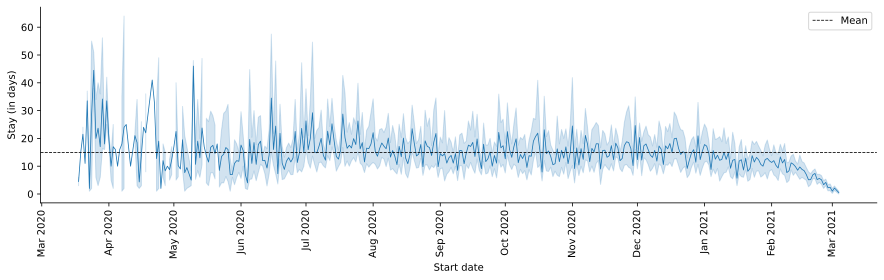

In [6]:
fig = plt.figure(figsize=(15, 4))
dur.plot.timeplot()
plt.show()

In [7]:
duration_bootstrap = distributions.DurationBootstrap.from_durations(dur)
icu_sim = icu.ICUSimulation(admissions, duration_bootstrap)

In [8]:
results = icu_sim.simulate(5)

Simulation:   0%|          | 0/5 [00:00<?, ?it/s]

In [9]:
df = results.hdi()

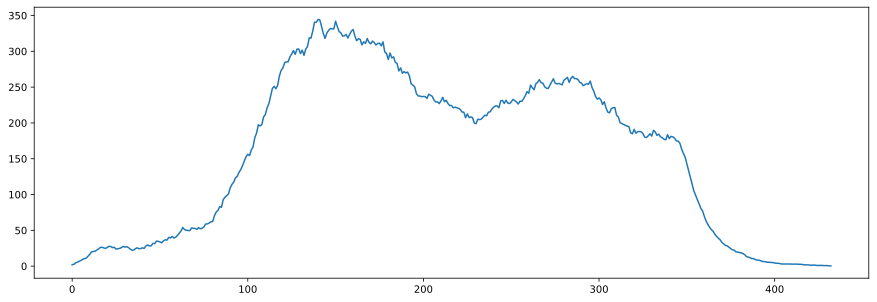

In [10]:
fig = plt.figure(figsize=(15, 5))
df["mean_val"].plot()
plt.show()

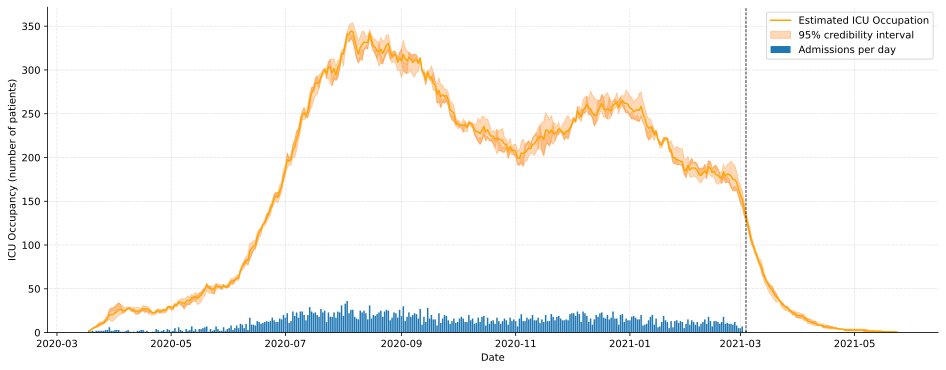

In [11]:
fig = plt.figure(figsize=(16, 6))
results.plot.lineplot()
plt.show()